In [3]:
from __future__ import print_function
import torch as t
from torch.autograd import Variable as V
from matplotlib import pyplot as plt
from IPython import display

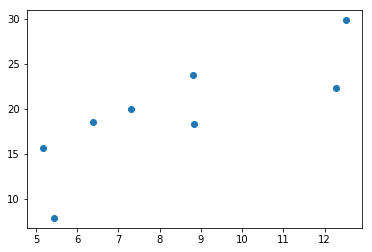

In [8]:
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1)) * 3
    return x, y

x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

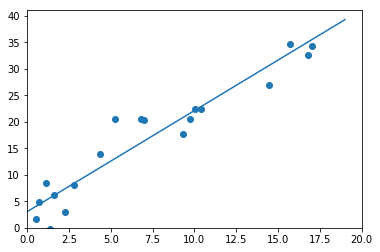

1.88374066353 2.95187807083


In [10]:
w = V(t.rand(1, 1), requires_grad=True)
b = V(t.zeros(1, 1), requires_grad=True)

lr = 0.001

for ii in range(8000):
    x, y = get_fake_data()
    x, y = V(x), V(y)
    
    # forward
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # backward
    loss.backward()
    
    # update
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii % 1000 == 0:
        display.clear_output(wait=True)
        x = t.arange(0, 20.0).view(-1, 1)
        y = x.mm(w.data) + b.data.expand_as(x)
        plt.plot(x.numpy(), y.numpy())
        
        x2, y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        
print(w.data.squeeze().item(), b.data.squeeze().item())
    